# Podcast Listening time prediction

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/train.csv", index_col= 0)
df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [3]:
df.shape

(750000, 11)

In [4]:
#look for duplicated rows
df.duplicated().sum()

0

In [5]:
#Check null values
df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [7]:
df.describe()
#5 Numerical features

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


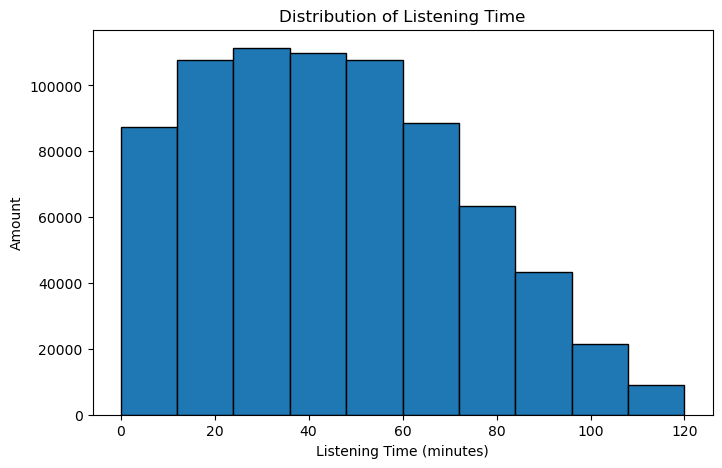

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Listening_Time_minutes'] ,edgecolor='black')
plt.title('Distribution of Listening Time')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Amount')
plt.show()

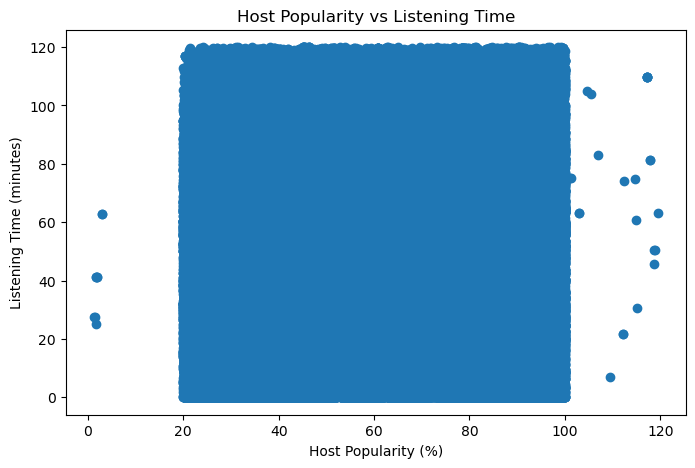

In [9]:

plt.figure(figsize=(8, 5))
plt.scatter(df['Host_Popularity_percentage'], df['Listening_Time_minutes'])
plt.title('Host Popularity vs Listening Time')
plt.xlabel('Host Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.show()


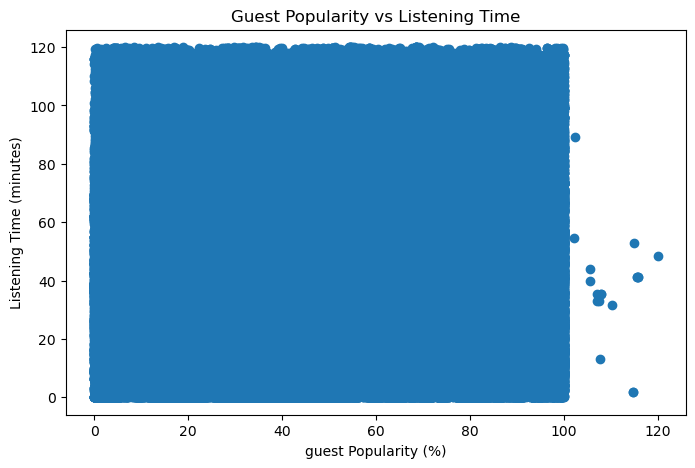

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Guest_Popularity_percentage'], df['Listening_Time_minutes'])
plt.title('Guest Popularity vs Listening Time')
plt.xlabel('guest Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.show()

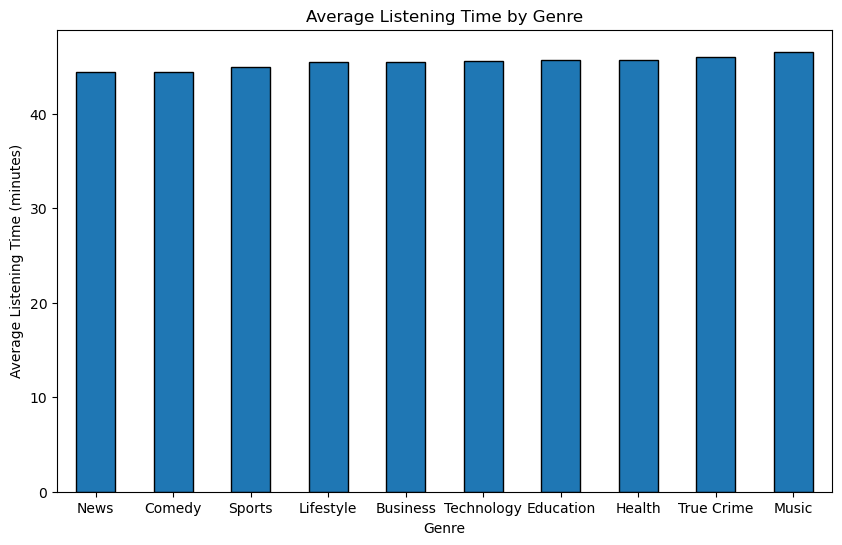

In [11]:
plt.figure(figsize=(10, 6))
genre_means = df.groupby('Genre')['Listening_Time_minutes'].mean()
genre_means.sort_values().plot(kind='bar', edgecolor='black')
plt.title('Average Listening Time by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Listening Time (minutes)')
plt.xticks(rotation=0)
plt.show()


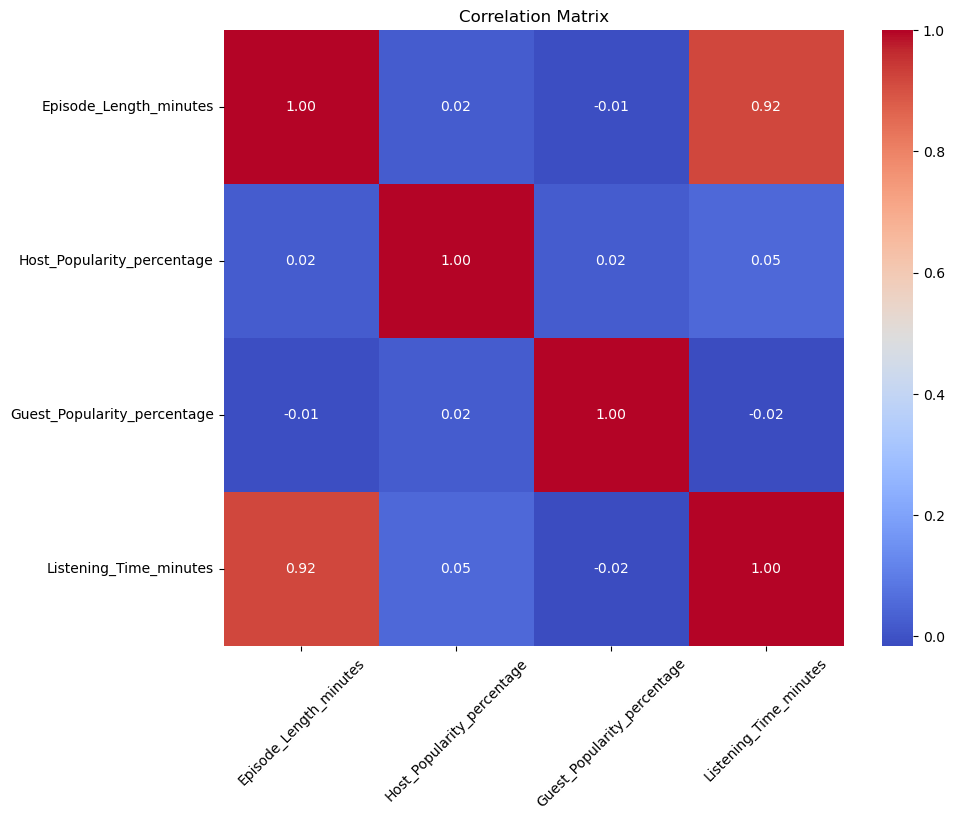

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Episode_Length_minutes', 'Host_Popularity_percentage', 
                         'Guest_Popularity_percentage', 'Listening_Time_minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()


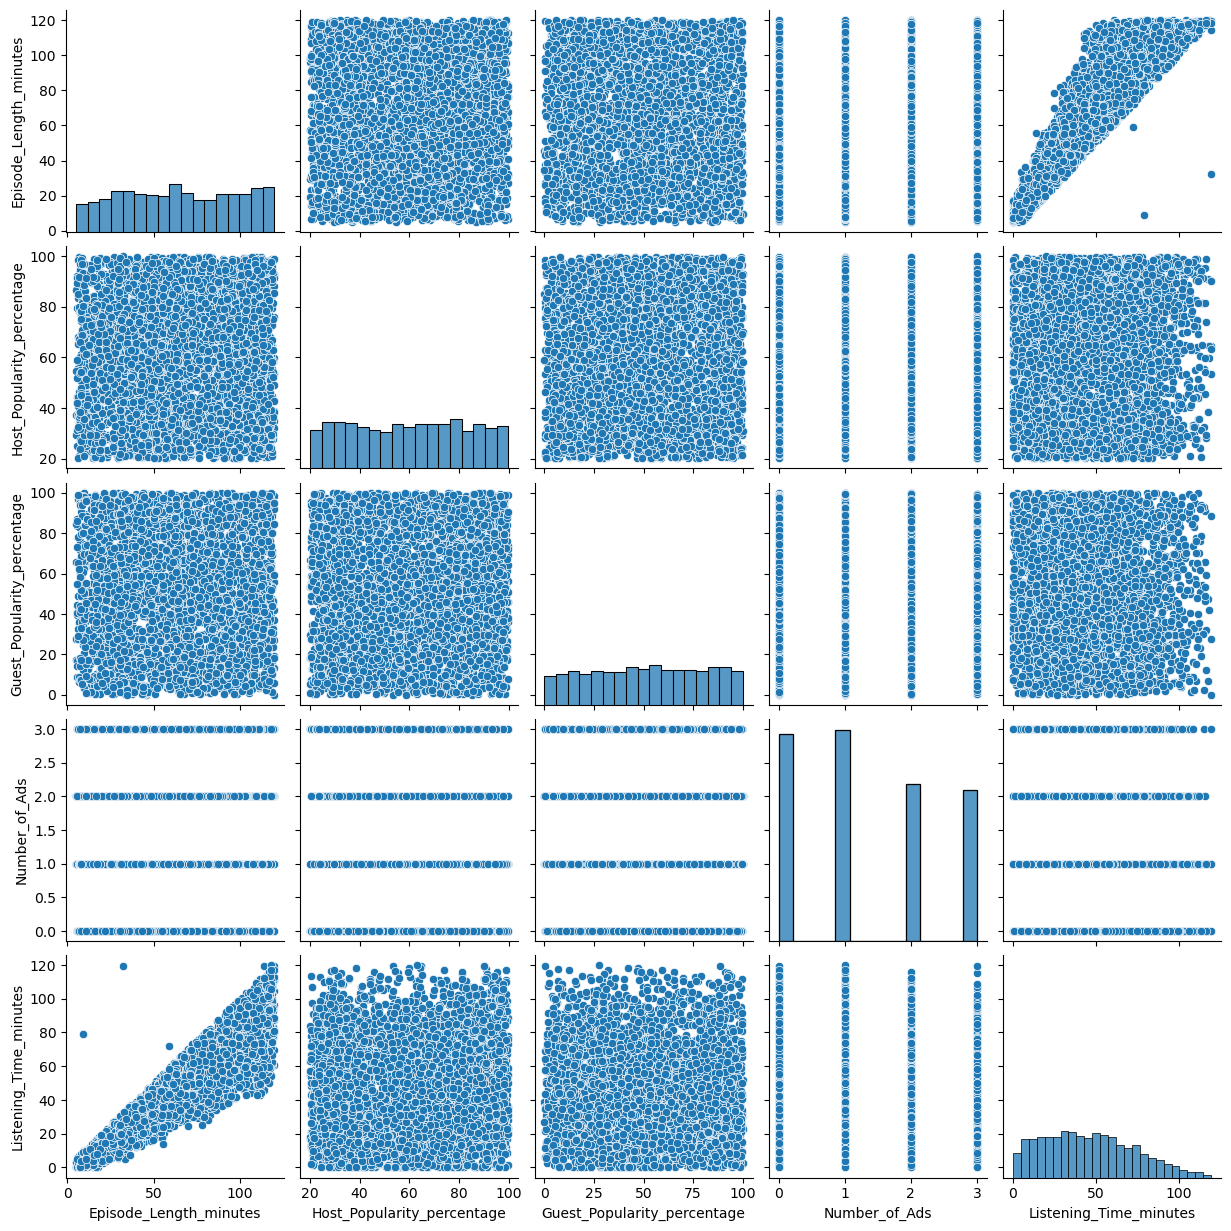

In [27]:
sns.pairplot(df.sample(5000)) 


##### Host popularity and Guest popularity have low correlation with the listening time

### Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
#Split data into train and test
target = "Listening_Time_minutes"
x = df.drop(target, axis=1)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 453635 to 121958
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 600000 non-null  object 
 1   Episode_Title                600000 non-null  object 
 2   Episode_Length_minutes       530372 non-null  float64
 3   Genre                        600000 non-null  object 
 4   Host_Popularity_percentage   600000 non-null  float64
 5   Publication_Day              600000 non-null  object 
 6   Publication_Time             600000 non-null  object 
 7   Guest_Popularity_percentage  483107 non-null  float64
 8   Number_of_Ads                599999 non-null  float64
 9   Episode_Sentiment            600000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 50.4+ MB


In [15]:
x_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          69628
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    116893
Number_of_Ads                       1
Episode_Sentiment                   0
dtype: int64

In [16]:
df['Episode_Length_minutes'].skew()


-0.002005612638236027

In [17]:
df['Guest_Popularity_percentage'].skew()


-0.10703539321672813

In [18]:
nom_features = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time"]
ord_feature = ["Episode_Sentiment"]
num_features = ["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage", "Number_of_Ads"]

##### Create Pipelines for preprocessing

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

#Handle numerical features
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                                  ("scaler", StandardScaler())])
#Handle nominal features
nom_transformer = Pipeline(steps = [("encoder", OneHotEncoder(sparse_output=False))])
#Handle ordinal features
episode_sentiment = ["Negative" , "Neutral" , "Positive"]
ord_transformer = Pipeline(steps= [("encoder", OrdinalEncoder(categories= [episode_sentiment]))])


In [20]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[("num_feature", num_transformer, num_features),
                                               ("nom_feature", nom_transformer, nom_features),
                                               ("ord_feature", ord_transformer, ord_feature)])

#### Train model

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

from sklearn.ensemble import RandomForestRegressor

linear_regression_model = Pipeline(steps = [("preprocessor", preprocessor),
                                      ("model",LinearRegression())])

linear_regression_model.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Episode_Length_minutes',
                                                   'Host_Popularity_percentage',
                                                   'Guest_Popularity_percentage',
                                                   'Number_of_Ads']),
                                                 ('nom_feature',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Podcast_Name',
                                                   'Episode_Title', 'Genre',
                                                   'Publication_Day',
                                                   'Publication_Time']),
                                                 ('ord_feature',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Negative',
                                                                                               'Neutral',
                                                                                               'Positive']]))]),
                                                  ['Episode_Sentiment'])])),
                ('model', LinearRegression())])

In [43]:
elastic_net_model = Pipeline(steps = [("preprocessor", preprocessor),
                                      ("model", ElasticNet())])
elastic_net_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Episode_Length_minutes',
                                                   'Host_Popularity_percentage',
                                                   'Guest_Popularity_percentage',
                                                   'Number_of_Ads']),
                                                 ('nom_feature',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Podcast_Name',
                                                   'Episode_Title', 'Genre',
                                                   'Publication_Day',
                                                   'Publication_Time']),
                                                 ('ord_feature',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Negative',
                                                                                               'Neutral',
                                                                                               'Positive']]))]),
                                                  ['Episode_Sentiment'])])),
                ('model', ElasticNet())])

In [45]:
y_predict_lr = linear_regression_model.predict(x_test)
y_predict_elastic_net = elastic_net_model.predict(x_test)
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
print("Linear Regression")
print("MAE: {}".format(mean_absolute_error(y_test, y_predict_lr)))
print("RMSE: {}".format(root_mean_squared_error(y_test, y_predict_lr)))
print("R2: {}".format(r2_score(y_test, y_predict_lr)))

print("ElasticNet")
print("MAE: {}".format(mean_absolute_error(y_test, y_predict_elastic_net)))
print("RMSE: {}".format(root_mean_squared_error(y_test, y_predict_elastic_net)))
print("R2: {}".format(r2_score(y_test, y_predict_elastic_net)))


Linear Regression
MAE: 9.776302000379168
RMSE: 13.345296262284139
R2: 0.7579636911410854
ElasticNet
MAE: 12.204595073872655
RMSE: 15.673710633324644
R2: 0.666137430554513


#### Fine tune hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid_elastic_net = {
    "model__alpha": [0.01, 0.1, 1, 10],
    "model__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]  # 1 = Lasso, 0 = Ridge
}

grid_search = GridSearchCV(elastic_net_model, param_grid= param_grid_elastic_net, cv = 3, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

y_predict_after_gridsearch = grid_search.predict(x_test)
print("MAE: {}".format(mean_absolute_error(y_test, y_predict_after_gridsearch)))
print("RMSE: {}".format(root_mean_squared_error(y_test, y_predict_after_gridsearch)))
print("R2: {}".format(r2_score(y_test, y_predict_after_gridsearch)))


MAE: 9.772469700235852
RMSE: 13.349348333026406
R2: 0.757816688463869


In [60]:
best_model = grid_search.best_estimator_

In [50]:

print(grid_search.best_params_)

{'model__alpha': 0.01, 'model__l1_ratio': 0.1}


#### Create submission for Kaggle

In [56]:
test_df = pd.read_csv("./data/test.csv")
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [58]:
ids = test_df["id"]
x_test_kaggle = test_df.drop("id", axis = 1)

In [59]:
x_test_kaggle.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [61]:
y_pred_kaggle = best_model.predict(x_test_kaggle)

In [63]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "Listening_Time_minutes": y_pred_kaggle
})

submission.head()

,id,Listening_Time_minutes
0,750000,55.689702
1,750001,20.139021
2,750002,51.127798
3,750003,80.645850
4,750004,50.317594


In [64]:
submission.to_csv("submission.csv", index=False)

#### Make submission with linear regression

In [65]:
y_pred_kaggle_lr = linear_regression_model.predict(x_test_kaggle)

In [66]:
submission2 = pd.DataFrame({
    "id": test_df["id"],
    "Listening_Time_minutes": y_pred_kaggle_lr
})

submission2.head()

,id,Listening_Time_minutes
0,750000,55.446289
1,750001,19.428711
2,750002,51.190918
3,750003,80.556152
4,750004,50.511230


In [67]:
submission.to_csv("submission2.csv", index=False)